In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2025-04-19 09:23:26.843388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745029406.863549 2409193 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745029406.868651 2409193 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745029406.881652 2409193 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745029406.881665 2409193 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745029406.881668 2409193 computation_placer.cc:177] computation placer alr

In [29]:
df = pd.read_csv(r'/home/long/longdata/kaggle compe/dataset/num_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   vendor_id              1458644 non-null  int64  
 1   passenger_count        1458644 non-null  int64  
 2   pickup_longitude       1458644 non-null  float64
 3   pickup_latitude        1458644 non-null  float64
 4   dropoff_longitude      1458644 non-null  float64
 5   dropoff_latitude       1458644 non-null  float64
 6   store_and_fwd_flag     1458644 non-null  int64  
 7   trip_duration          1458644 non-null  int64  
 8   haversine_km           1458644 non-null  float64
 9   bearing                1458644 non-null  float64
 10  trip_duration_minutes  1458644 non-null  float64
 11  log_trip_duration      1458644 non-null  float64
 12  avg_speed_kph          1458644 non-null  float64
 13  is_zero_distance       1458644 non-null  bool   
 14  pickup_cluster    

In [30]:
x = df.drop(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'trip_duration'], axis=1)
y = df['trip_duration']
print(x.columns)

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'haversine_km', 'bearing', 'trip_duration_minutes',
       'log_trip_duration', 'avg_speed_kph', 'is_zero_distance',
       'pickup_cluster', 'dropoff_cluster'],
      dtype='object')


In [31]:
def rmsle(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    y_true = tf.clip_by_value(y_true, 1e-7, tf.reduce_max(y_true))
    y_pred = tf.clip_by_value(y_pred, 1e-7, tf.reduce_max(y_pred))
    log_true = tf.math.log(y_true + 1.0)
    log_pred = tf.math.log(y_pred + 1.0)
    return tf.sqrt(tf.reduce_mean(tf.square(log_pred - log_true)))

In [32]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [33]:
model = keras.Sequential([
    layers.Input(shape=(12,)), 

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),

    layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=rmsle,
    metrics=[rmsle]
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [34]:
history = model.fit(
    x_scaled, y,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 1.0399 - rmsle: 1.0399 - val_loss: 0.0769 - val_rmsle: 0.0768
Epoch 2/100
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.1477 - rmsle: 0.1477 - val_loss: 0.0642 - val_rmsle: 0.0642
Epoch 3/100
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.1236 - rmsle: 0.1236 - val_loss: 0.0530 - val_rmsle: 0.0530
Epoch 4/100
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.1095 - rmsle: 0.1095 - val_loss: 0.0502 - val_rmsle: 0.0501
Epoch 5/100
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.1001 - rmsle: 0.1001 - val_loss: 0.0428 - val_rmsle: 0.0428
Epoch 6/100
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0920 - rmsle: 0.0920 - val_loss: 0.0327 - val_rmsle: 0.0327
Epoch 7/100
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0860 - rmsle: 0.0860 - val_loss: 0.0284 - val_rmsle: 0.0284
Epoch 8/100
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.0805 - rmsle: 0.0805 - val_loss: 0.0302 - val_rmsle:

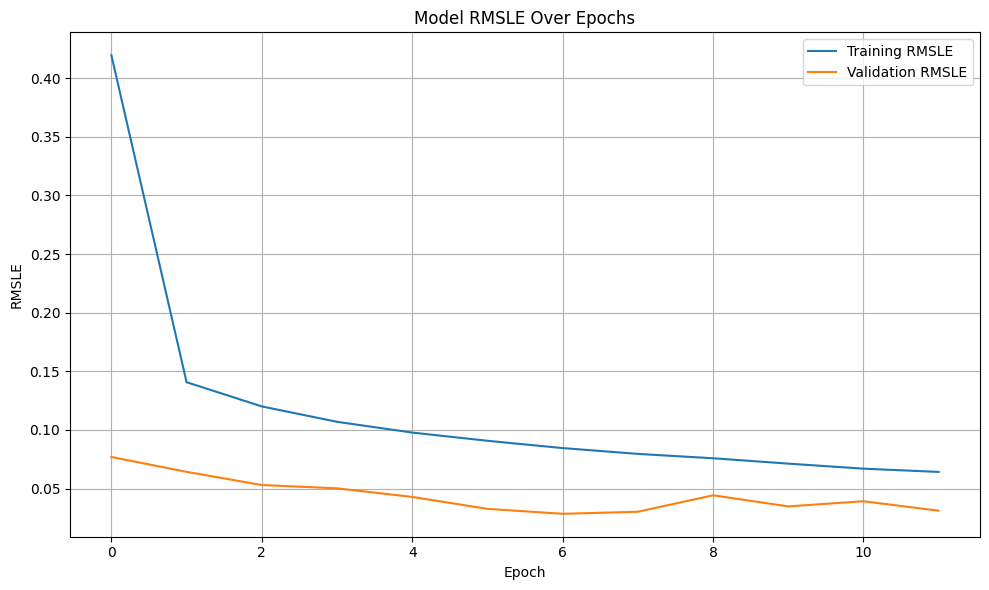

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training RMSLE')
plt.plot(history.history['val_loss'], label='Validation RMSLE')
plt.title('Model RMSLE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSLE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
model.save('bully-maguire.keras')

In [17]:
test_df = pd.read_csv(r'/home/long/longdata/kaggle compe/dataset/test.csv')
df = pd.read_csv(r'/home/long/longdata/kaggle compe/dataset/num_df.csv')
scaler = StandardScaler()
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [18]:
# test_df = test_df.drop(['id', 'vendor_id', 'passenger_count', 'store_and_fwd_flag'], axis=1)
# test_df.head()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_log_error
from tensorflow.keras.models import load_model

def haversine(lat1, lon1, lat2, lon2):
    R = 6371 
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

def bearing(lat1, lon1, lat2, lon2):
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    x = np.sin(dLon) * np.cos(lat2)
    y = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(dLon)
    return (np.degrees(np.arctan2(x, y)) + 360) % 360

test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])
test_df['haversine_km'] = haversine(test_df['pickup_latitude'], test_df['pickup_longitude'],
                                    test_df['dropoff_latitude'], test_df['dropoff_longitude'])
test_df['bearing'] = bearing(test_df['pickup_latitude'], test_df['pickup_longitude'],
                             test_df['dropoff_latitude'], test_df['dropoff_longitude'])

pickup_coords = df[['pickup_latitude', 'pickup_longitude']].dropna()
dropoff_coords = df[['dropoff_latitude', 'dropoff_longitude']].dropna()

pickup_kmeans = KMeans(n_clusters=10, random_state=42).fit(pickup_coords)
dropoff_kmeans = KMeans(n_clusters=10, random_state=42).fit(dropoff_coords)

test_df['pickup_cluster'] = pickup_kmeans.predict(test_df[['pickup_latitude', 'pickup_longitude']])
test_df['dropoff_cluster'] = dropoff_kmeans.predict(test_df[['dropoff_latitude', 'dropoff_longitude']])

feature_columns = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
                   'haversine_km', 'bearing', 'pickup_cluster', 'dropoff_cluster']
scaler = StandardScaler()
scaler.fit(df[feature_columns])  

x_test_scaled = scaler.transform(test_df[feature_columns])  
def rmsle(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    y_true = tf.clip_by_value(y_true, 1e-7, tf.reduce_max(y_true))
    y_pred = tf.clip_by_value(y_pred, 1e-7, tf.reduce_max(y_pred))
    log_true = tf.math.log(y_true + 1.0)
    log_pred = tf.math.log(y_pred + 1.0)
    return tf.sqrt(tf.reduce_mean(tf.square(log_pred - log_true)))

model = load_model(
    r'/home/long/longdata/kaggle compe/nyc-taxi-trip-duration/bully-maguire.keras',
    custom_objects={'rmsle': rmsle}
)
y_pred = model.predict(x_test_scaled)

test_predictions = pd.DataFrame({
    'predictions': y_pred.flatten()
})

test_predictions.to_csv('test_pred.csv', index=False)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 12, but received input with shape (32, 8)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 8), dtype=float32)
  • training=False
  • mask=None